In [2]:
from scipy.stats import norm
import numpy as np
def compute_spearman_ci(rho, n, alpha=0.05):
    # Calculate the Fisher transformation of rho
    z = 0.5 * np.log((1 + rho) / (1 - rho))

    # Calculate the standard error
    se = 1 / np.sqrt(n - 3)

    # Calculate the critical value
    z_critical = norm.ppf(1 - alpha / 2)

    # Calculate the confidence interval bounds
    lower_bound = np.tanh(z - z_critical * se)
    upper_bound = np.tanh(z + z_critical * se)

    # Convert back to the correlation scale
    lower_correlation = (np.exp(2 * lower_bound) - 1) / (np.exp(2 * lower_bound) + 1)
    upper_correlation = (np.exp(2 * upper_bound) - 1) / (np.exp(2 * upper_bound) + 1)

    return lower_correlation, upper_correlation

def compute_pearson_ci(r, n, alpha=0.05):
    # Calculate the standard error
    se = 1 / np.sqrt(n - 2)

    # Calculate the critical value
    z_critical = norm.ppf(1 - alpha / 2)

    # Calculate the confidence interval bounds
    lower_bound = np.tanh(np.arctanh(r) - z_critical * se)
    upper_bound = np.tanh(np.arctanh(r) + z_critical * se)

    return lower_bound, upper_bound

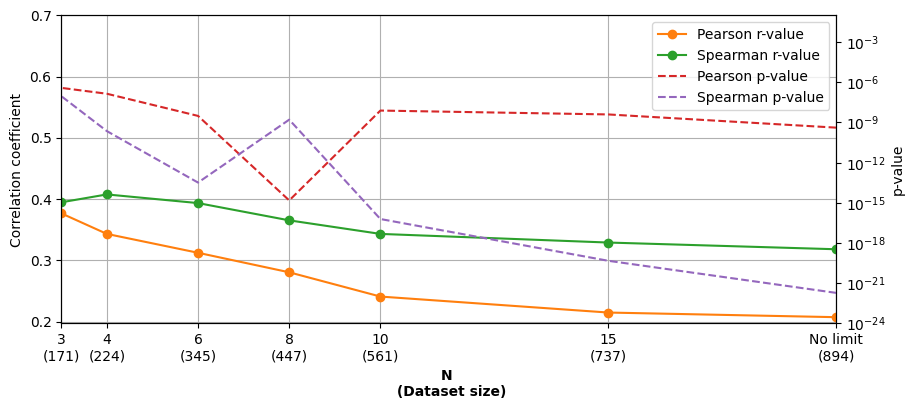

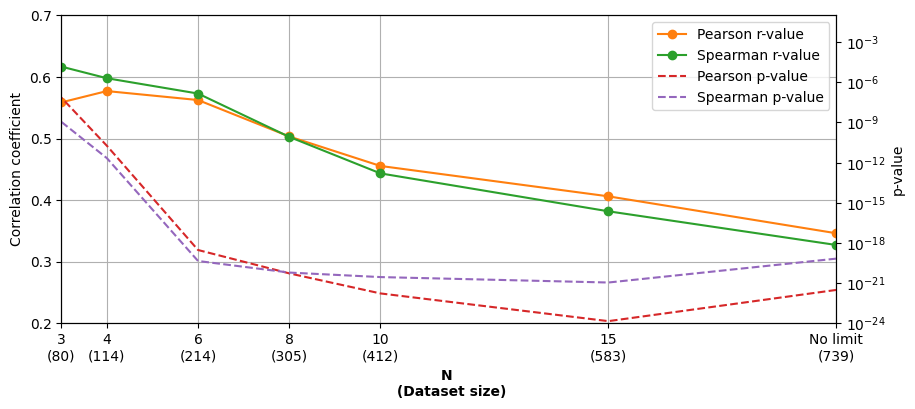

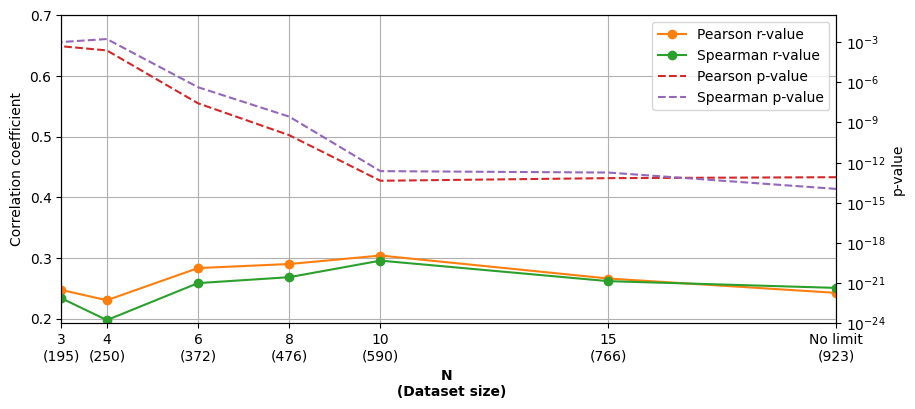

[[0.14348136 0.26894593]
 [0.14470544 0.28242662]
 [0.16124484 0.31713615]
 [0.1927252  0.3635655 ]
 [0.21383672 0.40435535]
 [0.22223048 0.45349355]
 [0.24058235 0.49821207]] [[0.25222919 0.35898296]
 [0.2570773  0.37295884]
 [0.26165445 0.39193191]
 [0.27474893 0.41607532]
 [0.29155946 0.44550155]
 [0.28401547 0.4709543 ]
 [0.25427547 0.47326349]]


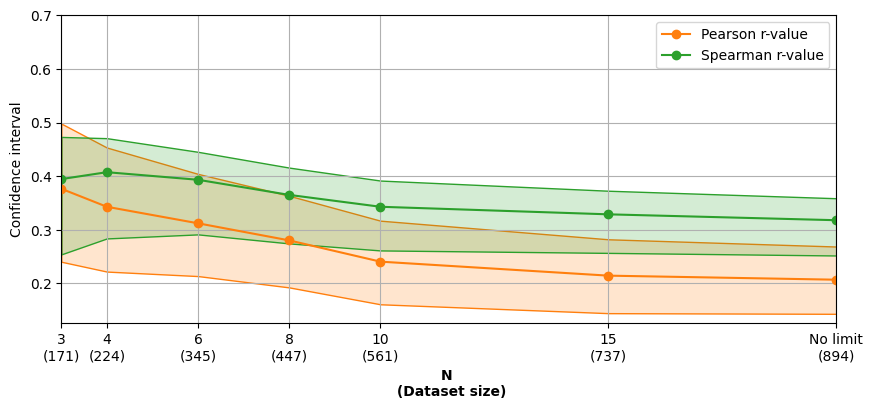

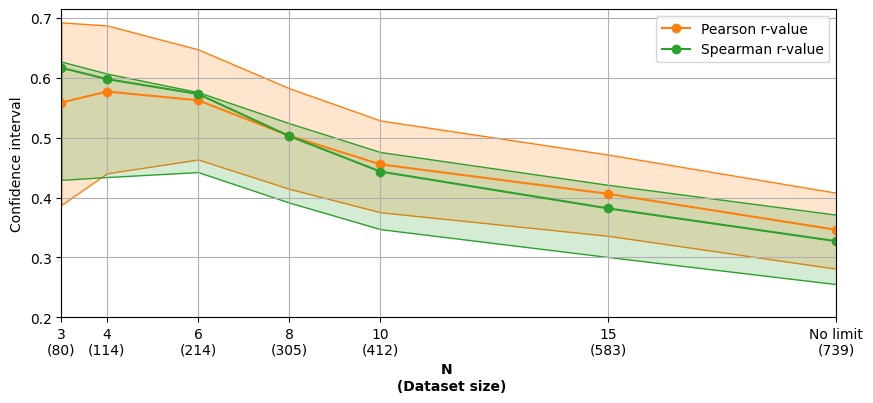

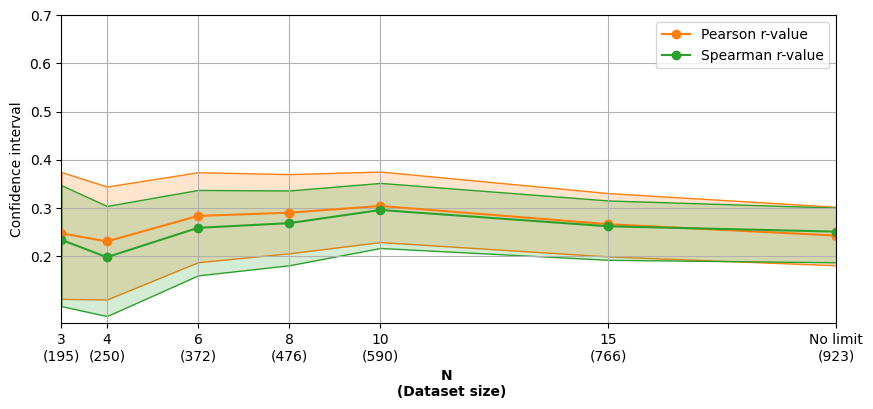

'plot_r_with_error(xticks, raw_nums, raw_rvals, conf_ints_raw, \n                  "Pearson r-value and confidence intervals at 95% confidence for RAW_40 dataset.")\nplot_r_with_error(xticks, fn_nums, fn_rvals, conf_ints_fn, \n                  "Pearson r-value and confidence intervals at 95% confidence for FNs_40 dataset.")\nplot_r_with_error(xticks, fp_nums, fp_rvals, conf_ints_fp, \n                  "Pearson r-value and confidence intervals at 95% confidence for FPs_40 dataset.")'

In [79]:

import matplotlib.pyplot as plt


# Levels filtered at 
xticks = np.array([20, 15, 10, 8, 6, 4, 3])

raw_rvals = np.array([0.20706486,0.21463266,0.2407425,0.28036408,0.31223198,0.34305014,0.37665733]) 
raw_tvals = np.array([0.3179843100634806,0.3289468,0.343058,0.3651904059568607,
                      0.3933852424918718,0.40752637600175357,0.39465331635773293])
raw_nums = np.array([894,737,561,447,345,224,171])


raw_p_r = np.array([4.093914311465454e-10,3.965464818236526e-09,7.717532593027375e-09,
                    1.5050968954646814e-15,3.080745763009426e-09,1.3923196079823763e-07,3.8230002167618116e-07])
raw_p_t = np.array([1.871837467143378e-22, 4.666765560e-20, 6.14241930370552e-17, 
                    1.61574112124738e-09, 3.2383272278593235e-14, 2.2584466945459173e-10, 9.227062636615033e-08])

fn_rvals = np.array([0.34619907,0.40615816,0.45546885,0.50335188,0.56247374,0.57703238,0.55863512])
fn_tvals = np.array([0.3271635745902511,0.3818754508672732,0.4434151571266508,
                     0.5026829153309278,0.5730009901285827,0.5978903364868842,0.6167748894073731])
fn_nums = np.array([739,583,412,305,214,114,80])


fn_p_r = np.array([3.111508596475849e-22, 1.4540188669817972e-24, 1.7105788275676398e-22,
                   5.3823143204045774e-21, 2.98169675115928e-19, 1.8201472128773932e-11, 7.248788086440008e-08])
fn_p_t = np.array([6.773795417659089e-20, 1.1150024729477018e-21, 2.8405833948129316e-21,
                   6.177492928363394e-21, 4.5140717684110424e-20, 2.1630272574826422e-12, 1.1167845551294944e-09])

fp_rvals = np.array([0.24245321,0.26612412,0.3040021,0.29001587,0.28333095,0.23032558,0.24730341])
fp_tvals = np.array([0.25064876239589223,0.2617621009585715,0.2956034557683543,0.2683012015617714,
                             0.2585608353446074,0.19757630495953982,0.23362177475838009])
fp_nums = np.array([923,766,590,476,372,250,195])


fp_p_r = np.array([8.162968617752397e-14,6.947058075468974e-14,4.423716827295624e-14,
                   1.1192607827597996e-10,2.687671118566788e-08,0.00023969870754672452,0.0004912176663630447])
fp_p_t = np.array([1.0897897925648636e-14, 1.8169748012912345e-13, 2.3122804941743347e-13, 
                   2.720292019809399e-09, 4.272529891709918e-07, 0.0016935005506710135, 0.001012674853031675])



plt.style.use('default')
def plot_stats(xticks, nums, r, t, p_r, p_t, title):
    
    text_kw = {'fontweight': 'heavy'}
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set_xticks(xticks)
    ax.set_xlabel("N \n (Dataset size)", **text_kw)
    ax.set_ylabel("Correlation coefficient")
    ax.plot(xticks, r, 'o-', label='Pearson r-value', color='C1')
    ax.plot(xticks, t, 'o-', label='Spearman r-value', color='C2')
    #ax.set_title(title)
    
    ax2 = ax.twinx()
    ax.set_xticks(xticks)
    ax.set_xlim(xticks[len(xticks)-1], xticks[0])

    ax.set_yticks(np.linspace(0.2, 0.7, 6))
    ax2.set_ylim(10e-25, 10e-2)
    xlabels = ['{}\n({})'.format(x,nums[i]) if x!=20 else 'No limit\n({})'.format(nums[i]) for i, x in enumerate(xticks)]
    ax.set_xticklabels(xlabels)
    #ax2.set_ylim(np.min(p_t), np.max(p_t), auto=False)
    #ax2.set_yticks(np.logspace(np.min(p_t), np.max(p_t)))
    #ax2.set_yticklabels(np.logspace(np.min(p_t), np.max(p_t)))
    ax2.set_yscale('log')
    ax2.set_ylabel("p-value")
    ax2.plot(xticks, p_r, '--', label='Pearson p-value', color='C3')
    ax2.plot(xticks, p_t, '--', label='Spearman p-value', color='C4')
    h1, l1 = ax.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax.legend(h1+h2, l1+l2, loc='upper right')
    ax.grid()
    plt.show()

def plot_r_with_error(xticks, nums, r, t, r_ci, t_ci, title):
    text_kw = {'fontweight': 'bold'}
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set_xlim(xticks[len(xticks)-1], xticks[0])
    ax.set_xlabel("N \n (Dataset size)", **text_kw)
    ax.set_ylabel("Confidence interval")
    ax.plot(xticks, r, 'o-', label='Pearson r-value', color='C1')
    ax.plot(xticks, t, 'o-', label='Spearman r-value', color='C2')
    
    ax.fill_between(xticks, r_ci[:, 0], r_ci[:, 1], facecolor=(255/255, 127/255, 14/255, .2), 
                    edgecolor=(255/255, 127/255, 14/255, 1))
    ax.fill_between(xticks, t_ci[:, 0], t_ci[:, 1], facecolor=(44/255, 160/255, 44/255, .2), 
                    edgecolor=(44/255, 160/255, 44/255, 1))
    ax.set_xticks(xticks)
    xlabels = ['{}\n({})'.format(x,nums[i]) if x!=20 else 'No limit\n({})'.format(nums[i]) for i, x in enumerate(xticks)]
    ax.set_xticklabels(xlabels)
    
    ax.set_yticks(np.linspace(0.2, 0.7, 6))
    #ax.set_title(title)
    h1, l1 = ax.get_legend_handles_labels()
    ax.legend(h1, l1, loc='upper right')
    ax.grid()
    plt.show()
    
    
plot_stats(xticks, raw_nums, raw_rvals, raw_tvals, raw_p_r, raw_p_t, "Correlation coefficients and corresponding p-values for RAW_40 dataset.")
plot_stats(xticks, fn_nums, fn_rvals, fn_tvals, fn_p_r, fn_p_t, "Correlation coefficients and corresponding p-values for FNs_40 dataset.")
plot_stats(xticks, fp_nums, fp_rvals, fp_tvals, fp_p_r, fp_p_t, "Correlation coefficients and corresponding p-values for FPs_40 dataset.")


pearson_ci_raw = []
pearson_ci_fn  = []
pearson_ci_fp  = []
spearman_ci_raw = []
spearman_ci_fn = []
spearman_ci_fp = []

for r, n in zip(raw_rvals, raw_nums):
    pearson_ci_raw.append(compute_pearson_ci(r, n))
for r, n in zip(fn_rvals, fn_nums):
    pearson_ci_fn.append(compute_pearson_ci(r, n))
for r, n in zip(fp_rvals, fp_nums):
    pearson_ci_fp.append(compute_pearson_ci(r, n))
    
for t, n in zip(raw_tvals, raw_nums):
    spearman_ci_raw.append(compute_spearman_ci(t, n))
for t, n in zip(fn_tvals, fn_nums):
    spearman_ci_fn.append(compute_spearman_ci(t, n))
for t, n in zip(fp_tvals, fp_nums):
    spearman_ci_fp.append(compute_spearman_ci(t, n))  
    
pearson_ci_raw = np.array(pearson_ci_raw)
pearson_ci_fn  = np.array(pearson_ci_fn)
pearson_ci_fp  = np.array(pearson_ci_fp)
spearman_ci_raw = np.array(spearman_ci_raw)
spearman_ci_fn = np.array(spearman_ci_fn)
spearman_ci_fp = np.array(spearman_ci_fp)

print(pearson_ci_raw, spearman_ci_raw)
plot_r_with_error(xticks, raw_nums, raw_rvals, raw_tvals, pearson_ci_raw, spearman_ci_raw, 
                  "Correlation coefficients and confidence intervals at 95% confidence for the RAW_40 dataset.")




plot_r_with_error(xticks, fn_nums, fn_rvals, fn_tvals, pearson_ci_fn, spearman_ci_fn,
                  "Correlation coefficients and confidence intervals at 95% confidence for the FN_40 dataset.")


plot_r_with_error(xticks, fp_nums, fp_rvals, fp_tvals, pearson_ci_fp, spearman_ci_fp,
                  "Correlation coefficients and confidence intervals at 95% confidence for the FP_40 dataset.")



# CONFIDENCE INTERVALS AT alpha=.05 for Pearson r-value
"""conf_ints_raw = np.flip(np.array([
    (0.2401, 0.4985), (0.22199, 0.4537), (0.2137, 0.4045), 
    (0.1926, 0.3636), (0.1612, 0.3172), (0.1447, 0.2825), (0.1434, 0.2690)
]))
conf_ints_fn = np.flip(np.array([
    (0.3863, 0.6933),(0.4397, 0.6879),(0.4633, 0.6477),
    (0.4145, 0.5827),(0.3753, 0.5288),(0.3360, 0.4718),(0.2810, 0.4081)]

))
conf_ints_fp = np.flip(np.array([
    (0.1106, 0.3748),(0.1093, 0.3445),(0.1870, 0.3742),
    (0.2055, 0.3702),(0.2289, 0.3755),(0.1990, 0.3307),(0.1808, 0.3023)
 
]))"""

"""plot_r_with_error(xticks, raw_nums, raw_rvals, conf_ints_raw, 
                  "Pearson r-value and confidence intervals at 95% confidence for RAW_40 dataset.")
plot_r_with_error(xticks, fn_nums, fn_rvals, conf_ints_fn, 
                  "Pearson r-value and confidence intervals at 95% confidence for FNs_40 dataset.")
plot_r_with_error(xticks, fp_nums, fp_rvals, conf_ints_fp, 
                  "Pearson r-value and confidence intervals at 95% confidence for FPs_40 dataset.")"""